# 3.18. Life. One-time premium

In [27]:
s = 1
l0s = c(20, 35, 50, 65)
lr = 65
le = 120
rs = c(.02, .04)

theta0 = 0.0009
theta1 = 0.000044
theta2 = 0.09076

p = function(l0, K, theta0, theta1, theta2){
    p=exp(-theta0 - theta1*exp(theta2*l0:(l0+K-1)))
    kPlo = c(1, cumprod(p))
    return(list(0:K, kPlo))
    #plot(0:K, kPlo, "l", ylim=c(0,1))
}

oneTimePremium = function(l0,  theta0, theta1, theta2, lr, le, r){
    K = le-l0
    out = p(l0, K, theta0, theta1, theta2)
    kPl0 = unlist(out[2])
    Kr = lr - l0
    dk = (1+r)**(-(0:K))
    pi = s*sum(dk[1+Kr:K]*kPl0[1+Kr:K])
    return(pi)
}

for (j in 1:length(rs)){
    print(c('r', rs[j]))
    for (i in 1:length(l0s)){
        pi = oneTimePremium(l0s[i],  theta0, theta1, theta2, lr, le, rs[j])
        print(c('l0:',l0s[i], 'pi:', pi))
    }
}

[1] "r"    "0.02"
[1] "l0:"              "20"               "pi:"              "4.93873820272888"
[1] "l0:"             "35"              "pi:"             "6.7930737784058"
[1] "l0:"              "50"               "pi:"              "9.57014293026561"
[1] "l0:"              "65"               "pi:"              "14.8031652561939"
[1] "r"    "0.04"
[1] "l0:"              "20"               "pi:"              "1.72858809539546"
[1] "l0:"              "35"               "pi:"              "3.18155442543967"
[1] "l0:"              "50"               "pi:"              "5.99775832998673"
[1] "l0:"              "65"               "pi:"              "12.4143115156589"


Higher start age, higher one time premium.<br>
Higher discount rate, lower one time premiums.

# 3.19 Life. One-time premium. Varying retirement age.

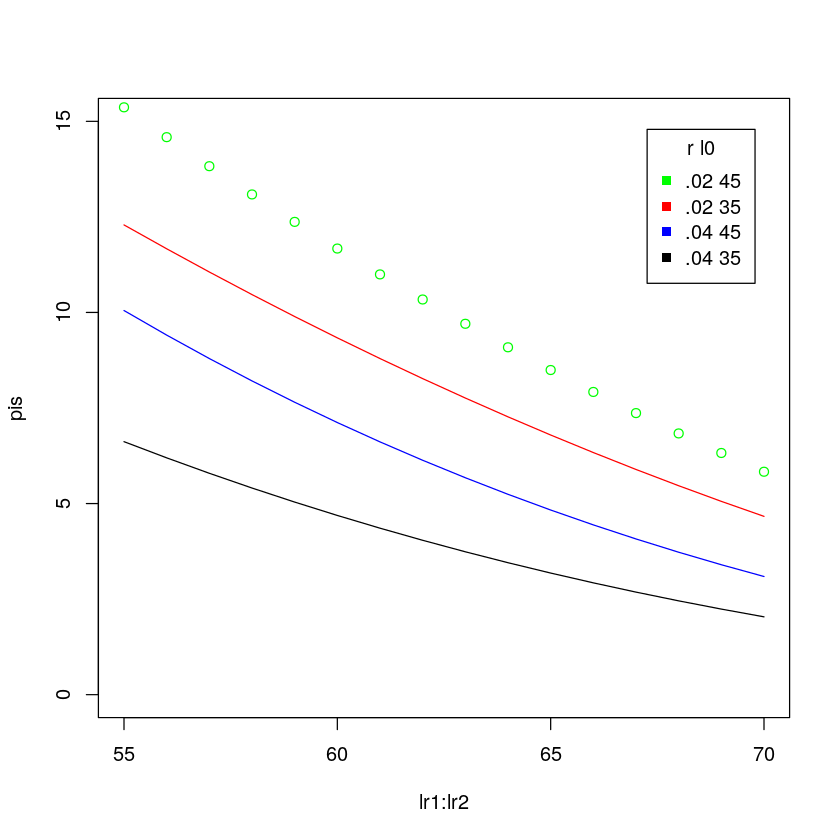

In [66]:
s = 1
l0s = c(45, 35)
lr1 = 55
lr2 = 70
le = 120
rs = c(.02, .04)

theta0 = 0.0009
theta1 = 0.000044
theta2 = 0.09076

p = function(l0, K, theta0, theta1, theta2){
    p=exp(-theta0 - theta1*exp(theta2*l0:(l0+K-1)))
    kPlo = c(1, cumprod(p))
    return(list(0:K, kPlo))
}

oneTimePremium = function(l0,  theta0, theta1, theta2, lr1, lr2, le, r){
    K = le-l0
    out = p(l0, K, theta0, theta1, theta2)
    kPl0 = unlist(out[2])
    dk = (1+r)**(-(0:K))
    a=dk[1:K]*kPl0[1:K] # sequence not sum
    pi = array(0,length(lr1:lr2)) # CHANGED FROM BOOK pi = array(0,K)
    idx = 1
    for (lr in lr1:lr2){
        pi[idx] = s*sum(a[(1+lr-l0):K]) # CHANGED from book. index
        idx = idx + 1
    }
    return(list(lr1:lr2, pi))
}

colors <- c("green", "red", "blue", 'black')
ymin = 0
ymax = 15
counter = 0
colorCounter = 1
for (j in 1:length(rs)){
    for (i in 1:length(l0s)){
        out = oneTimePremium(l0s[i],  theta0, theta1, theta2, lr1, lr2, le, rs[j])
        lrVals = unlist(out[1])
        pis = unlist(out[2])
        if (counter == 0){
            plot(lr1:lr2,pis, ylim=c(ymin, ymax), col=colors[colorCounter])
        }
        else{
            lines(lr1:lr2,pis, col=colors[colorCounter])
        }
        counter = counter + 1
        colorCounter = colorCounter + 1
    }
}
legends = c('.02 45', '.02 35','.04 45', '.04 35')
legend("topright", inset=.05, title="r l0", legend=legends, pch=15, col = colors);

Higher retirement age, lower premium.

# 3.20 Life. Survival number.

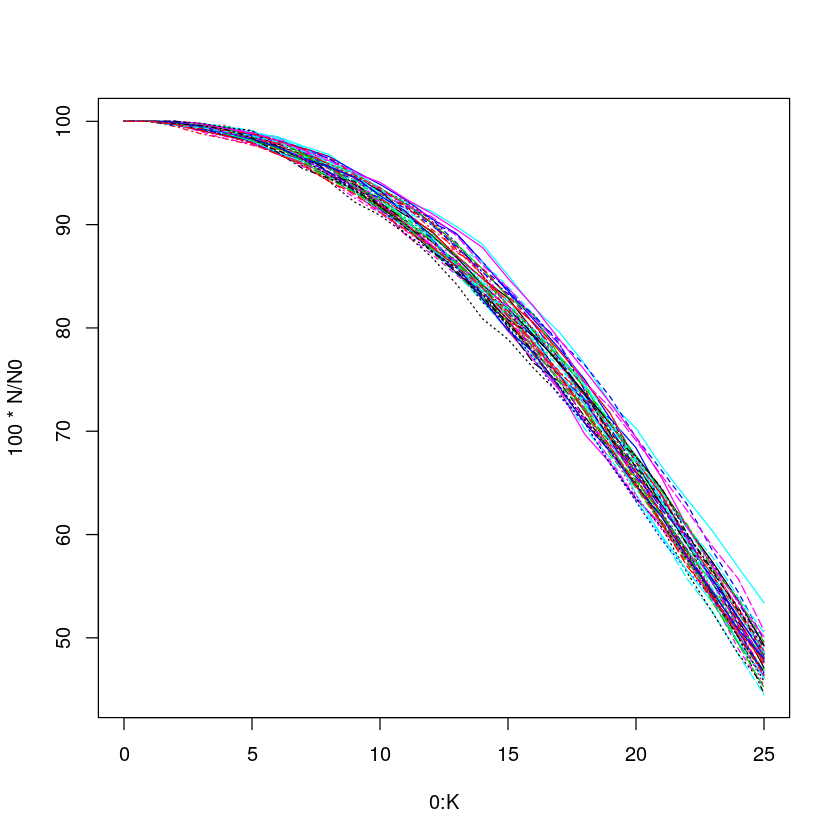

In [69]:
N0 = 1000
l0 = 30
K = 25
m = 50

p = function(l0, K, theta0, theta1, theta2){
    p=exp(-theta0 - theta1*exp(theta2*l0:(l0+K-1)))
    kPlo = c(1, cumprod(p))
    return(list(0:K, kPlo))
}

theta0 = 0.0009
theta1 = 0.000044
theta2 = 0.09076

NSequence = function(N0, l0, K, m){
    N = matrix(N0, K+1, m)
    pOut = p(l0, K, theta0, theta1, theta2)
    p = unlist(pOut[2])
    for (k in 1:K) N[k+1,] = rbinom(m, N[k,], p[k])
    matplot(0:K, 100*N/N0, "l")
}

NSequence(N0, l0, K, m)

Percentage alive goes down with time. <br>

Uncertainty increases with time, but stays about the same from 15 periods, which in this case is from 45 years and out.

# 3.21. Survival number and pension.
Pension equals the numnber of individuals surviving til retirement age times payout per individual.

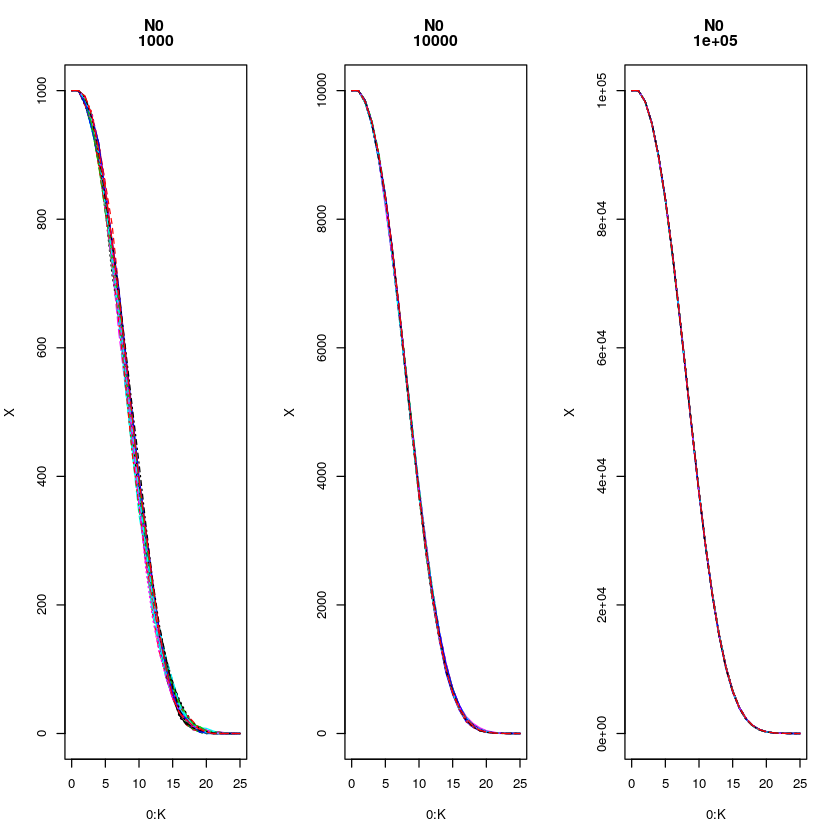

In [3]:
N0s = c(1000, 10000, 100000)
l0 = 65
K = 25
m = 50
s = 1

p = function(l0, K, theta0, theta1, theta2){
    p=exp(-theta0 - theta1*exp(theta2*l0:(l0+K-1)))
    kPlo = c(1, cumprod(p))
    return(list(0:K, kPlo))
}

theta0 = 0.0009
theta1 = 0.000044
theta2 = 0.09076

portfolioPayoff = function(N0, l0, K, m, s){
    N = matrix(N0, K+1, m)
    pOut = p(l0, K, theta0, theta1, theta2)
    p = unlist(pOut[2])
    for (k in 1:K) N[k+1,] = rbinom(m, N[k,], p[k])
    X = s*N
    return(X)
    #matplot(0:K, X, "l")
}

counter = 1
par(mfrow = c(1, 3))
for (N0 in N0s){
    X = portfolioPayoff(N0, l0, K, m, s)
    matplot(0:K, X, "l", main=c("N0 ", N0))
}


Uncertainty down with number of individuals.